데이터셋 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import sklearn

데이터 불러오기

In [ ]:
trip_df = pd.read_csv("/content/drive/MyDrive/ASAC 기업 프로젝트/data/tour.csv")

이미지 불러오기

In [ ]:
path = '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train'

In [ ]:
import glob
all_img_paths = glob.glob("/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/*.jpg")
print(len(all_img_paths))
print(all_img_paths[:10])
print("-"*30)

16986
['/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_15989.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_15913.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_15951.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_15981.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16033.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16023.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16000.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16061.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16032.jpg', '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16040.jpg']
------------------------------


이미지 확인

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt

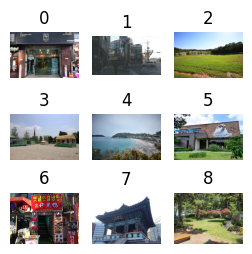

In [ ]:
plt.figure(figsize=(3,3))
for c in range(9):
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(all_img_paths[c]))
    plt.title(c)
    plt.axis('off')
plt.show()

라벨 확인

In [ ]:
labels = trip_df['cat3'].values.tolist()

label_list=[]
for i in labels:
    if i not in label_list:
        label_list.append(i)

print('The number of pictures:', trip_df.shape[0])
print('The number of labels:', len(label_list))
print('Labels:', label_list)

The number of pictures: 16986
The number of labels: 128
Labels: ['항구/포구', '골프', '한식', '야영장,오토캠핑장', '섬', '일반축제', '유적지/사적지', '일식', '자연휴양림', '전시관', '관광단지', '모텔', '스키(보드) 렌탈샵', '바/까페', '채식전문점', '한옥스테이', '컨벤션', '성', '중식', '안보관광', '전문상가', '이색거리', '해수욕장', '5일장', '미술관/화랑', '공원', '상설시장', '박물관', '도서관', '공연장', '농.산.어촌 체험', '복합 레포츠', '펜션', '산', '기념탑/기념비/전망대', '기념관', '자동차경주', '자전거하이킹', '희귀동.식물', '유명건물', '수목원', '유원지', '사찰', '강', '자연생태관광지', '박람회', '문화전수시설', '계곡', '폭포', '서양식', '종교성지', '동상', '기타행사', '고택', '국립공원', '게스트하우스', '썰매장', '요트', '문화원', '래프팅', '승마', '공예,공방', '트래킹', '온천/욕장/스파', '수련시설', '해안절경', '패밀리레스토랑', '기암괴석', '기타', '홈스테이', '민물낚시', '콘도미니엄', '민박', '테마공원', '유람선/잠수함관광', '바다낚시', '수영', '백화점', '호수', '카약/카누', '외국문화원', '면세점', '다리/대교', '카지노', '분수', '동굴', '도립공원', '윈드서핑/제트스키', '특산물판매점', '유스호스텔', '고궁', '서비스드레지던스', '민속마을', '전통공연', '문', '식음료', '번지점프', '터널', '문화관광축제', '카트', '클럽', '발전소', '대중콘서트', 'MTB', '군립공원', '스케이트', '대형서점', '생가', '스카이다이빙', '영화관', '헹글라이딩/패러글라이딩', '스노쿨링/스킨스쿠버다이빙', '약수터', '인라인(실내 인라인 포함)', '이색찜

데이터 프레임에 이미지경로 추가

In [ ]:
trip_df['fillpath'] = 0

In [ ]:
for i in range(len(trip_df)):
    trip_df['fillpath'][i] = '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/'+ trip_df['id'][i] +'.jpg'

<ipython-input-10-52d38ce60abf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_df['fillpath'][i] = '/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/'+ trip_df['id'][i] +'.jpg'


In [ ]:
trip_df['fillpath'][16985]

'/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_16985.jpg'

In [ ]:
trip_df

,id,img_path,overview,cat1,cat2,cat3,cat,fillpath
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구,자연,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프,레포츠,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식,한식,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식,한식,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식,한식,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
...,...,...,...,...,...,...,...,...
16981,TRAIN_16981,./image/train/TRAIN_16981.jpg,해발 12000m에 자리한 식담겸 카페점문점이다.<br>곤드레밥과 감자전을 판매하고...,음식,음식점,한식,한식,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
16982,TRAIN_16982,./image/train/TRAIN_16982.jpg,설악힐호텔은 동해고속도로 속초톨게이트에서 멀지 않은 관광로 변에 있다. 속초의 대표...,숙박,숙박시설,모텔,숙박,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
16983,TRAIN_16983,./image/train/TRAIN_16983.jpg,충남 서산시 중심가에 위치한 줌모텔은 프라이버스가 보장되는 조용한 공간으로 가치가 ...,숙박,숙박시설,모텔,숙박,/content/drive/MyDrive/ASAC 기업 프로젝트/da...
16984,TRAIN_16984,./image/train/TRAIN_16984.jpg,토토큰바위캠핑장은 경기도 가평지역 내에서도 청정지역으로 손꼽히는 지역으로 주변에 화...,레포츠,육상 레포츠,"야영장,오토캠핑장",레포츠,/content/drive/MyDrive/ASAC 기업 프로젝트/da...


In [ ]:
trip_df['fillpath'][0]

'/content/drive/MyDrive/ASAC 기업 프로젝트/data/image/train/TRAIN_00000.jpg'

이미지 나누기

In [ ]:
from sklearn.model_selection import train_test_split

# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(trip_df, test_size=0.2, random_state=0)
train_df.shape,test_df.shape

((13588, 8), (3398, 8))

In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 파일 경로와 해당 이미지들의 클래스를 담은 DataFrame 생성
# df_image = pd.DataFrame({'filename': all_img_paths, 'class': [os.path.basename(path).split('.')[0] for path in all_img_paths]})

# 검증 데이터 비율 설정
validation_split = 0.2

# 이미지 사이즈 및 배치 크기 설정
img_width, img_height, img_channel = 224, 224, 3
batch_size = 32

# 데이터 증강 설정
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)
test_datagen = ImageDataGenerator(rescale = 1./255)

# 데이터 생성기 설정
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='fillpath',
        y_col='cat',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 0,
        subset='training',
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        shuffle=True, # 데이터를 섞을지 여부
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest")

validation_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='fillpath',
        y_col='cat',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        seed = 0,
        subset='validation',
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        shuffle=True, # 데이터를 섞을지 여부
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest")

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col='fillpath',
        y_col='cat', # 테스트 데이터에는 카테고리 정보가 없으므로 None으로 설정
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle= False # 예측 결과를 원래 순서와 동일하게 유지
    )

Found 10871 validated image filenames belonging to 11 classes.
Found 2717 validated image filenames belonging to 11 classes.
Found 3398 validated image filenames belonging to 11 classes.


Resnet 모델 불러오기(34,50,101,152)

In [ ]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications import ResNet50, DenseNet201, VGG19
from keras.preprocessing import image
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
# 입력 이미지
img_width, img_height, img_channel = 224, 224, 3
num_classes=trip_df['cat'].nunique()

# 훈련된 모델 사용
base_model_DenseNet201 = DenseNet201(weights='imagenet', include_top=False, input_shape = (img_width, img_height, img_channel))
base_model_DenseNet201.trainable = False

model_DenseNet201 = keras.Sequential([
    base_model_DenseNet201,
    Dense(768, activation='relu'),
    GlobalMaxPooling2D(),
    # Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model_DenseNet201.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_DenseNet201.summary()

74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 dense (Dense)               (None, 7, 7, 768)         1475328   
                                                                 
 global_max_pooling2d (Glob  (None, 768)               0         
 alMaxPooling2D)                                                 
                                                                 
 dense_1 (Dense)             (None, 11)                8459      
                                                                 
Total params: 19805771 (75.55 MB)
Trainable params: 1483787 (5.66 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


전체 모델 학습

In [ ]:
import seaborn as sns
from time import perf_counter

import os.path
import cv2
import tensorflow as tf

from pathlib import Path
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [ ]:
# 모델 학습
model_DenseNet201.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
340/340 [==============================] - 5303s 16s/step - loss: 1.7345 - accuracy: 0.4982 - val_loss: 1.3502 - val_accuracy: 0.5528
Epoch 2/5
340/340 [==============================] - 160s 471ms/step - loss: 0.9816 - accuracy: 0.6713 - val_loss: 1.5286 - val_accuracy: 0.5179
Epoch 3/5
340/340 [==============================] - 159s 467ms/step - loss: 0.6366 - accuracy: 0.7876 - val_loss: 1.4817 - val_accuracy: 0.5429
Epoch 4/5
340/340 [==============================] - 141s 416ms/step - loss: 0.3146 - accuracy: 0.9119 - val_loss: 1.6843 - val_accuracy: 0.5392
Epoch 5/5
340/340 [==============================] - 141s 416ms/step - loss: 0.1439 - accuracy: 0.9661 - val_loss: 2.0531 - val_accuracy: 0.5009


In [ ]:
def get_embedding(model, img_path):
    # Pillow 이미지 로드
    img = image.load_img(img_path, target_size=(img_width, img_height))
    # numpy 데이터로 변환 (224, 224, 3)
    x = image.img_to_array(img)
    # 차원을 추가해준다. (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # 1차원의 배열로 재배열해준다. [[5.232, 2.12, ...]] -> [5.232, 2.12, ...]
    return model.predict(x).reshape(-1)

In [ ]:
# 전체 데이터 임베딩
df_sample = trip_df
map_embeddings = df_sample['fillpath'].apply(lambda img: get_embedding(model_DenseNet201, img))
df_embs = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 47ms/step
(16986, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.440241,0.010376,0.015441,1.446360e-04,4.597693e-04,0.000079,8.274960e-05,6.007215e-04,3.291891e-03,0.002464,0.526819
1,0.994775,0.000137,0.000001,5.922717e-09,1.936424e-07,0.000002,2.830619e-03,4.948666e-04,6.890539e-07,0.000004,0.001755
2,0.080327,0.170965,0.005255,1.204620e-02,3.895347e-04,0.541162,1.718666e-04,7.626968e-04,1.294590e-03,0.141917,0.045709
3,0.000056,0.000002,0.000481,9.974050e-04,2.198247e-05,0.038795,1.801163e-07,1.966945e-07,3.435476e-04,0.958608,0.000694
4,0.031206,0.002015,0.000993,1.220459e-01,4.434534e-05,0.020424,4.439535e-05,1.068030e-04,1.332315e-04,0.819869,0.003118


In [ ]:
df_embs.to_csv('/content/drive/MyDrive/ASAC 기업 프로젝트/개인코드/장서연/dacon/embeddings.csv', index=False)

np.save('/content/drive/MyDrive/ASAC 기업 프로젝트/개인코드/장서연/dacon/embeddings.npy', df_embs.values)

df_embs.to_pickle('/content/drive/MyDrive/ASAC 기업 프로젝트/개인코드/장서연/dacon/embeddings.pkl')

In [ ]:
# 모델을 저장할 파일 경로
model_save_path = '/content/drive/MyDrive/ASAC 기업 프로젝트/개인코드/장서연/dacon'

# 모델 저장
model_DenseNet201.save(model_save_path)

유사도 계산

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# cosine 거리 계산
pairwise_distances(df_embs, metric='cosine')

# 정규화
cosine_sim = 1 - pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.0000000e+00, 6.4234257e-01, 1.5163940e-01, 4.1957498e-03],
       [6.4234257e-01, 1.0000000e+00, 1.3577402e-01, 6.4313412e-05],
       [1.5163940e-01, 1.3577402e-01, 9.9999994e-01, 2.7639508e-01],
       [4.1957498e-03, 6.4313412e-05, 2.7639508e-01, 1.0000000e+00]],
      dtype=float32)

유사 이미지 출력

In [ ]:
indices = pd.Series(range(len(trip_df)), index=trip_df.index)

def get_recommender(idx, df, top_n = 5):
    sim_idx = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]

    return indices.iloc[idx_rec].index, idx_sim

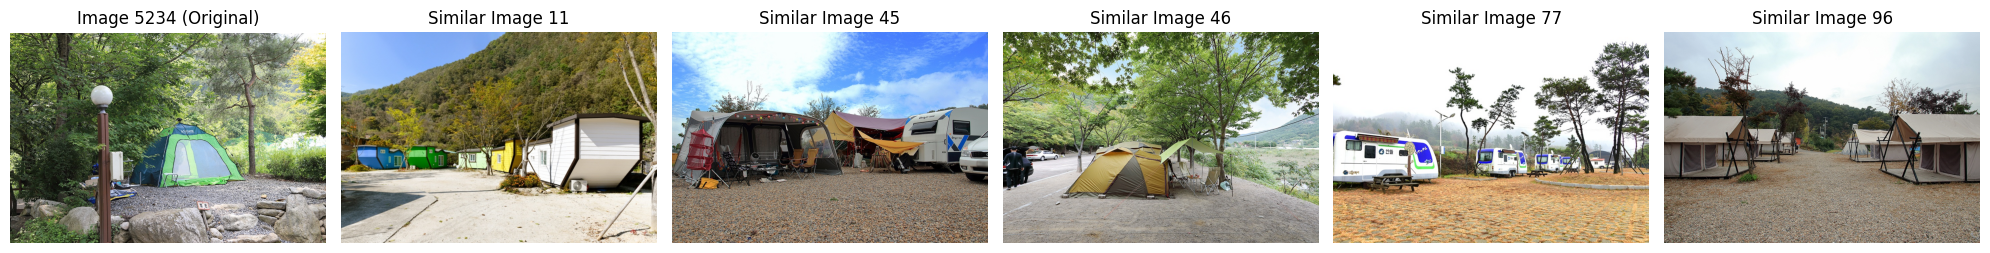

[1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
idx_ref = 5234 # 여기에 번호 넣으면 그 번호에 맞는 이미지와 유사한 이미지가 나옴
idx_rec, idx_sim = get_recommender(idx_ref, trip_df, top_n = 5)

img_original_path = os.path.join(path, trip_df.iloc[idx_ref]['fillpath'])
plt.fig, axes = plt.subplots(1, 6, figsize=(20, 3.5))

img_original = plt.imread(img_original_path)
axes[0].imshow(img_original)
axes[0].set_title(f'Image {idx_ref} (Original)')
axes[0].axis('off')
for ax, idx in zip(axes[1:],idx_rec):
    img_path = os.path.join(path, trip_df.iloc[idx]['fillpath'])  # 유사한 이미지의 전체 경로
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'Similar Image {idx}')
    # ax.title(f'Similar Image {idx}', loc='left', pad=20)
    # ax.title(f'Similar percent {percent}', loc='right', pad=20)
    ax.axis('off')

plt.tight_layout()
plt.show()
print(idx_sim)

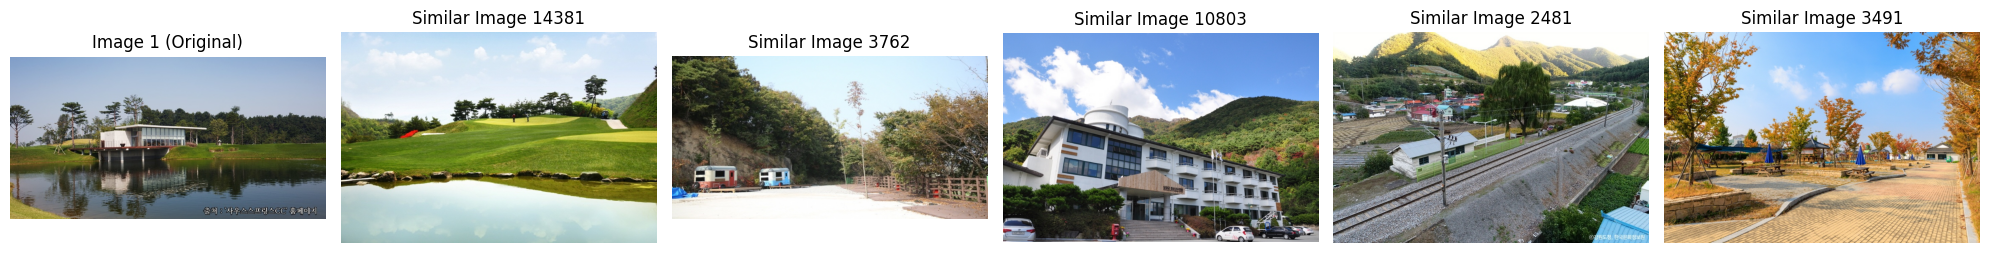

[0.9999997, 0.9999994, 0.9999994, 0.9999989, 0.9999989]


In [ ]:
idx_ref = 1 # 여기에 번호 넣으면 그 번호에 맞는 이미지와 유사한 이미지가 나옴
idx_rec, idx_sim = get_recommender(idx_ref, trip_df, top_n = 5)

img_original_path = os.path.join(path, trip_df.iloc[idx_ref]['fillpath'])
plt.fig, axes = plt.subplots(1, 6, figsize=(20, 3.5))

img_original = plt.imread(img_original_path)
axes[0].imshow(img_original)
axes[0].set_title(f'Image {idx_ref} (Original)')
axes[0].axis('off')
for ax, idx in zip(axes[1:],idx_rec):
    img_path = os.path.join(path, trip_df.iloc[idx]['fillpath'])  # 유사한 이미지의 전체 경로
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'Similar Image {idx}')
    # ax.title(f'Similar Image {idx}', loc='left', pad=20)
    # ax.title(f'Similar percent {percent}', loc='right', pad=20)
    ax.axis('off')

plt.tight_layout()
plt.show()
print(idx_sim)

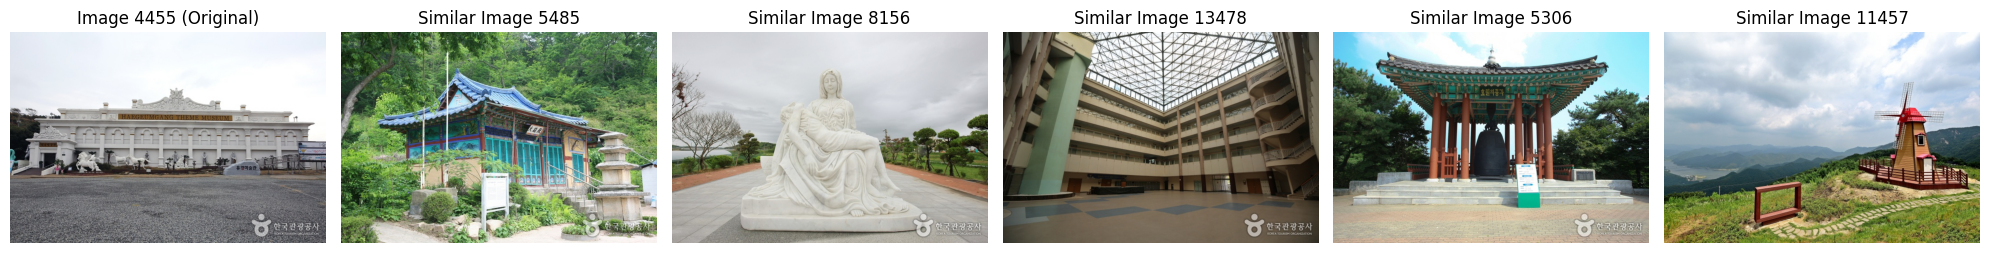

[0.99890566, 0.9884019, 0.98672915, 0.97876453, 0.97610676]


In [ ]:
idx_ref = 4455 # 여기에 번호 넣으면 그 번호에 맞는 이미지와 유사한 이미지가 나옴
idx_rec, idx_sim = get_recommender(idx_ref, trip_df, top_n = 5)

img_original_path = os.path.join(path, trip_df.iloc[idx_ref]['fillpath'])
plt.fig, axes = plt.subplots(1, 6, figsize=(20, 3.5))

img_original = plt.imread(img_original_path)
axes[0].imshow(img_original)
axes[0].set_title(f'Image {idx_ref} (Original)')
axes[0].axis('off')
for ax, idx in zip(axes[1:],idx_rec):
    img_path = os.path.join(path, trip_df.iloc[idx]['fillpath'])  # 유사한 이미지의 전체 경로
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'Similar Image {idx}')
    # ax.title(f'Similar Image {idx}', loc='left', pad=20)
    # ax.title(f'Similar percent {percent}', loc='right', pad=20)
    ax.axis('off')

plt.tight_layout()
plt.show()
print(idx_sim)

In [ ]:
path = '/content/test1.jpg' # 바다
want_pic = get_embedding(model_DenseNet201, path)
target_vector = want_pic
top_similar_vectors, top_similar_image_ids = find_most_similar_images_5(df_embs, target_vector, top_n=5)
# 내가 넣고 싶은 이미지 넣기
img_original_path = os.path.join(path)
img_original = plt.imread(img_original_path)
# 내가 넣은 이미지 첫번째 배치
plt.fig, axes = plt.subplots(1, 6, figsize=(20, 3.5))
axes[0].imshow(img_original)
axes[0].set_title(f'Image {idx_ref} (Original)')
axes[0].axis('off')

#
for ax, idx in zip(axes[1:],top_similar_image_ids):
    img_path = os.path.join(path, trip_df.iloc[idx]['fillpath'])  # 유사한 이미지의 전체 경로
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f'Similar Image {idx}')
    ax.axis('off')

plt.tight_layout()
plt.show()
print(idx_sim) # 밑에 유사도 나옴

1/1 [==============================] - 0s 53ms/step


NameError: name 'find_most_similar_images_5' is not defined